In [41]:
from qimax.stabilizer import StabilizerGenerator
import numpy as np
num_qubits = 3
num_layers = 3

stb = StabilizerGenerator(num_qubits)
gates = np.random.choice(['h','cx','s', 'rx', 'ry', 'rz'], 2000)
for gate in gates:
    index = np.random.choice(num_qubits)
    if gate == 'h':
        stb.h(index)
    elif gate == 'cx':
        target = np.random.choice([x for x in range(num_qubits) if x != index])
        stb.cx([index, target])
    elif gate == 's':
        stb.s(index)
    elif gate == 'rx':
        angle = np.random.uniform(0, 2*np.pi)
        stb.rx(angle, index)
    elif gate == 'ry':
        angle = np.random.uniform(0, 2*np.pi)
        stb.ry(angle, index)
    elif gate == 'rz':
        angle = np.random.uniform(0, 2*np.pi)
        stb.rz(angle, index)
dm = stb.generate_density_matrix_by_generator_jax()

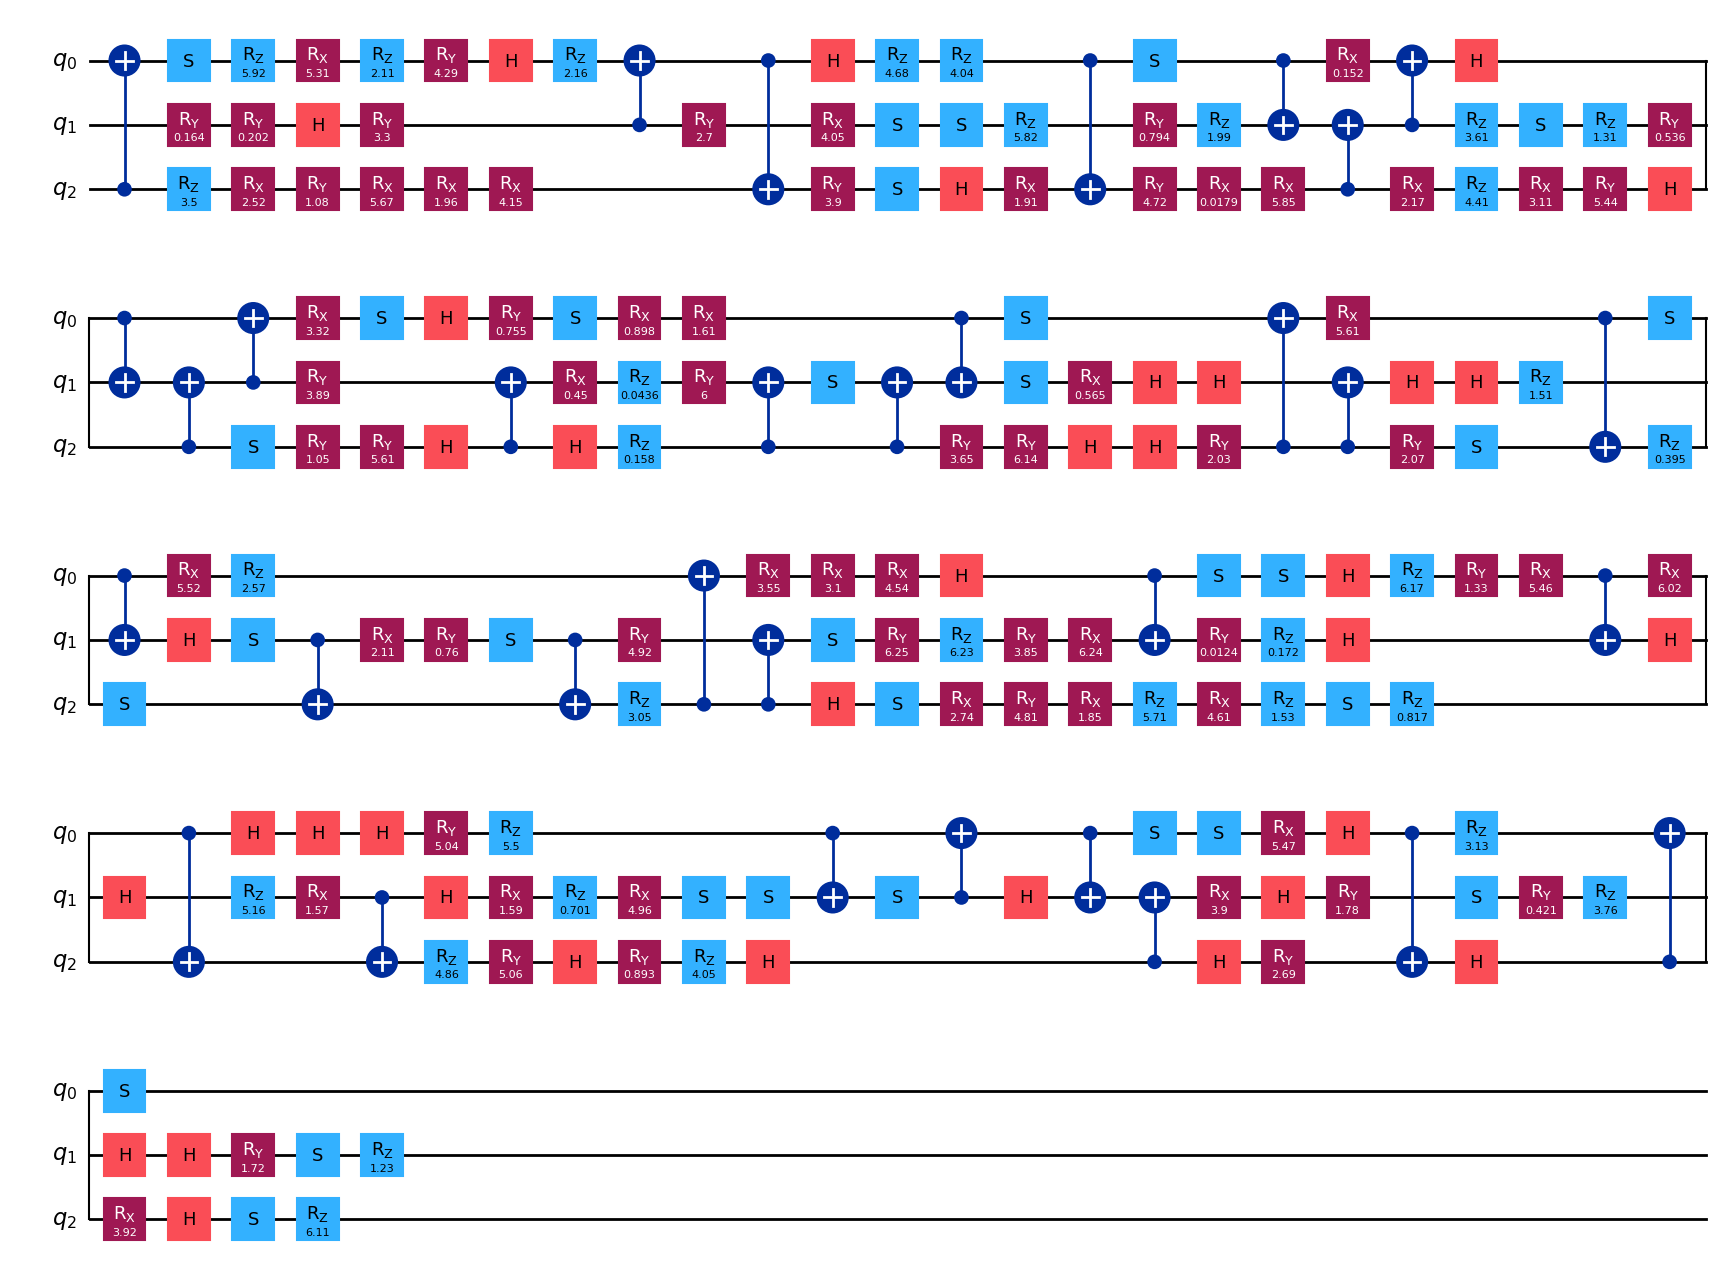

In [43]:
import qiskit
import qiskit.quantum_info as qi
qc = qiskit.QuantumCircuit(num_qubits)
gates = np.random.choice(['h','cx','s', 'rx', 'ry', 'rz'], 200)
for gate in gates:
    index = np.random.choice(num_qubits)
    if gate == 'h':
        qc.h(index)
    elif gate == 'cx':
        target = np.random.choice([x for x in range(num_qubits) if x != index])
        qc.cx(index, target)
    elif gate == 's':
        qc.s(index)
    elif gate == 'rx':
        angle = np.random.uniform(0, 2*np.pi)
        qc.rx(angle, index)
    elif gate == 'ry':
        angle = np.random.uniform(0, 2*np.pi)
        qc.ry(angle, index)
    elif gate == 'rz':
        angle = np.random.uniform(0, 2*np.pi)
        qc.rz(angle, index)

dm = qi.DensityMatrix(qc)
qc.draw('mpl')